# Project: covid



# Name: Bhavesh, Karolina
# CUS-620
# Data Mining project 

#Importing libraries 

In [107]:
import numpy as np 
import pandas as pd 

In [108]:
# if we want to import the dataset directly
#from google.colab import files 
#uploaded = files.upload()

In [109]:
from google.colab import drive #here we mount google drive with this so, we can import file from google drive directly
drive.mount('/content/Mydrive/') 

Drive already mounted at /content/Mydrive/; to attempt to forcibly remount, call drive.mount("/content/Mydrive/", force_remount=True).


In [110]:
#uploaded the datset to google drive so, now it works as local pc 
df=pd.read_csv('/content/Mydrive/My Drive/covid.csv') #made pandas dataframe for the dataset
df #print the database with pandas dataframe

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,3/5/20,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,7/4/20,6/4/20,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,1/5/20,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [111]:
df.columns #to know all the columns names

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [112]:
#checking if there is any missing value in the dataset
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [113]:
#checking head 
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# Pre-Processing 

In [114]:
covid = df #making covid as a variable and will use a  pandas dataframe 
cov = covid[["sex","patient_type",'date_died','pneumonia','age','asthma','copd','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','covid_res']]

In [115]:
cov.columns

Index(['sex', 'patient_type', 'date_died', 'pneumonia', 'age', 'asthma',
       'copd', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'covid_res'],
      dtype='object')

In [116]:
#changing date died values from 9999-99-99 to 0 which mean not died

cov["date_died"] = np.where(cov["date_died"] == '9999-99-99', 0, cov["date_died"])

cov

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sex,patient_type,date_died,pneumonia,age,asthma,copd,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
0,2,1,0,2,27,2,2,2,2,2,2,2,2,2,1
1,2,1,0,2,24,2,2,2,2,2,2,2,2,2,1
2,1,2,0,2,54,2,2,2,2,2,2,1,2,2,1
3,2,2,0,1,30,2,2,2,2,2,2,2,2,2,1
4,1,2,22-04-2020,2,60,2,2,2,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,0,2,58,2,2,2,2,2,2,2,2,2,3
566598,1,1,0,2,48,2,2,2,2,2,2,2,2,2,3
566599,1,2,0,1,49,2,2,2,2,2,2,1,2,2,3
566600,1,1,0,1,43,2,2,2,2,2,2,2,2,2,3


In [117]:
#changing date died values from given dates to 1 which mean died
cov["date_died"] = np.where(cov["date_died"] != 0, 1, cov["date_died"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
#Since this dataset is about covid and we trying to figure out which factor can cause this 
#so, add NA to all the values if the number is greater to 2
#Since we only want to see if case is true(1) or false(0)
cov["pneumonia"] = cov["pneumonia"].astype(int)
cov["pneumonia"] = np.where(cov["pneumonia"] > 2 , np.nan ,cov["pneumonia"])
cov.loc[cov["hypertension"]>2, 'hypertension'] = "NA"
cov.loc[cov["other_disease"]>2, 'other_disease'] = "NA"
cov.loc[cov["cardiovascular"]>2, 'cardiovascular'] = "NA"
cov.loc[cov["obesity"]>2, 'obesity'] = "NA"
cov.loc[cov["renal_chronic"]>2, 'renal_chronic'] = "NA"
cov.loc[cov["tobacco"]>2, 'tobacco'] = "NA"
cov.loc[cov["asthma"]>2, 'asthma'] = "NA"
cov.loc[cov["copd"]>2, 'copd'] = "NA"
cov.loc[cov["inmsupr"]>2, 'inmsupr'] = "NA"
cov.loc[cov["covid_res"]>2, 'covid_res'] = "NA"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [119]:
cov = cov.replace('NA', np.nan)

In [120]:
cov.isnull().sum()

sex                   0
patient_type          0
date_died             0
pneumonia            11
age                   0
asthma             1752
copd               1749
inmsupr            1980
hypertension       1824
other_disease      2598
cardiovascular     1822
obesity            1781
renal_chronic      1792
tobacco            1907
covid_res         66910
dtype: int64

# Removing the missing values 

In [121]:
# removing the missing values rows and call the dataframe as a new variable 
covClean = cov.dropna()

In [122]:
covClean.to_csv ('/content/Mydrive/My Drive/results.csv', index = False, header=True) # this is make a file in the google drive as name

In [123]:
covClean = pd.read_csv('/content/Mydrive/My Drive/results.csv')

In [124]:
#checking if there is any missing value in the dataset
covClean.isnull().sum()

sex               0
patient_type      0
date_died         0
pneumonia         0
age               0
asthma            0
copd              0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
covid_res         0
dtype: int64

In [125]:
covClean.describe()

,sex,patient_type,date_died,pneumonia,age,asthma,copd,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res
count,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000,496537.000000
mean,1.505976,1.213789,0.067659,1.843772,42.515269,1.967487,1.983465,1.983890,1.837172,1.969191,1.977218,1.836020,1.979983,1.913942,1.558929
std,0.499965,0.409980,0.251159,0.363072,16.623992,0.177359,0.127519,0.125897,0.369209,0.172801,0.149207,0.370258,0.140057,0.280450,0.496516
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,2.000000,1.000000,0.000000,2.000000,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,1.000000,0.000000,2.000000,53.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,1.000000,2.000000,120.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Visualization Techniques

In [126]:
#Use at least 2 different visualization techniques to visualize the data

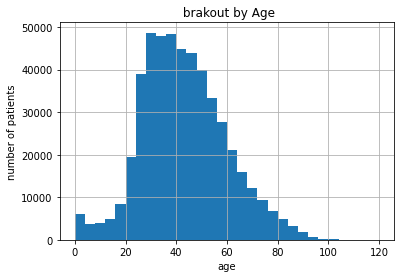

In [127]:
import matplotlib.pyplot as plt
covClean['age'].hist(bins=30)

plt.title(' brakout by Age')
plt.xlabel('age')
plt.ylabel('number of patients')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution')

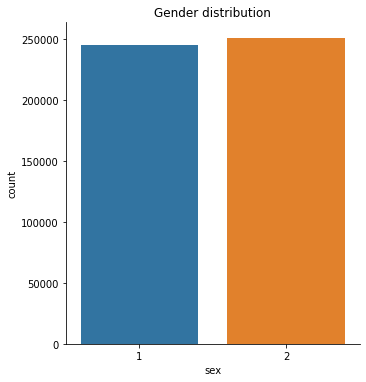

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot('sex',data=covClean,kind='count')
plt.title('Gender distribution')

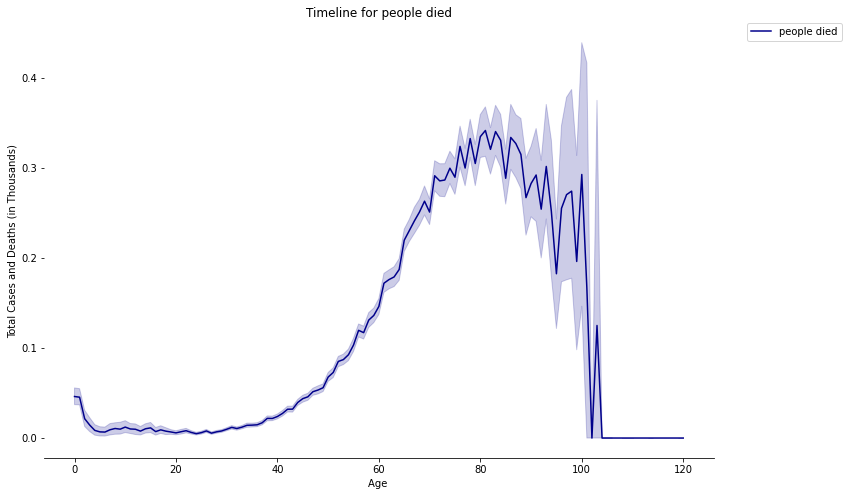

In [147]:
plt.figure(figsize=(12,8))
de= sns.lineplot(x='age', y='date_died', data=df, color='darkblue', label='people died')
de.set_xlabel('Age ')
de.set_ylabel('Total Cases and Deaths (in Thousands)')
de.set_title ('Timeline for people died')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Data Mining (machine learning) Techniques 

In [130]:
#Use at least 2 different data mining (machine learning) techniques to analyze and/or make predictions on the data 
#and report on the results – techniques such as regression, k-means, naïve bayes, or decision trees / random forest, or apriori.

### Classification Models

------------------------------
Training and Testing dataset 
------------------------------

Dividing a dataset into 60% training and 40% testing

In [131]:
from sklearn.model_selection import train_test_split
x = covClean.drop(['date_died'], axis=1)
y = covClean['date_died']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.4)

In [132]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(297922, 14)
(198615, 14)
(297922,)
(198615,)


-------------------------
Decision tree classifier
-------------------------

Work in Progress

In [133]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
myTree = myTree.fit(x_train, y_train)

In [134]:
predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred).sum()))

Accuracy on test data is 0.94
Number of mislabeled points out of a total 198615 points : 19763


[Text(1395.0, 996.6, 'patient_type <= 1.5\nentropy = 0.357\nsamples = 297922\nvalue = [277784, 20138]'),
 Text(697.5, 815.4000000000001, 'pneumonia <= 1.5\nentropy = 0.07\nsamples = 234459\nvalue = [232487, 1972]'),
 Text(348.75, 634.2, 'age <= 50.5\nentropy = 0.588\nsamples = 7479\nvalue = [6420, 1059]'),
 Text(174.375, 453.0, 'covid_res <= 1.5\nentropy = 0.299\nsamples = 4643\nvalue = [4397, 246]'),
 Text(87.1875, 271.79999999999995, 'age <= 39.5\nentropy = 0.429\nsamples = 2483\nvalue = [2265, 218]'),
 Text(43.59375, 90.59999999999991, 'entropy = 0.284\nsamples = 1416\nvalue = [1346, 70]'),
 Text(130.78125, 90.59999999999991, 'entropy = 0.581\nsamples = 1067\nvalue = [919, 148]'),
 Text(261.5625, 271.79999999999995, 'other_disease <= 1.5\nentropy = 0.1\nsamples = 2160\nvalue = [2132, 28]'),
 Text(217.96875, 90.59999999999991, 'entropy = 0.326\nsamples = 84\nvalue = [79, 5]'),
 Text(305.15625, 90.59999999999991, 'entropy = 0.088\nsamples = 2076\nvalue = [2053, 23]'),
 Text(523.125, 4

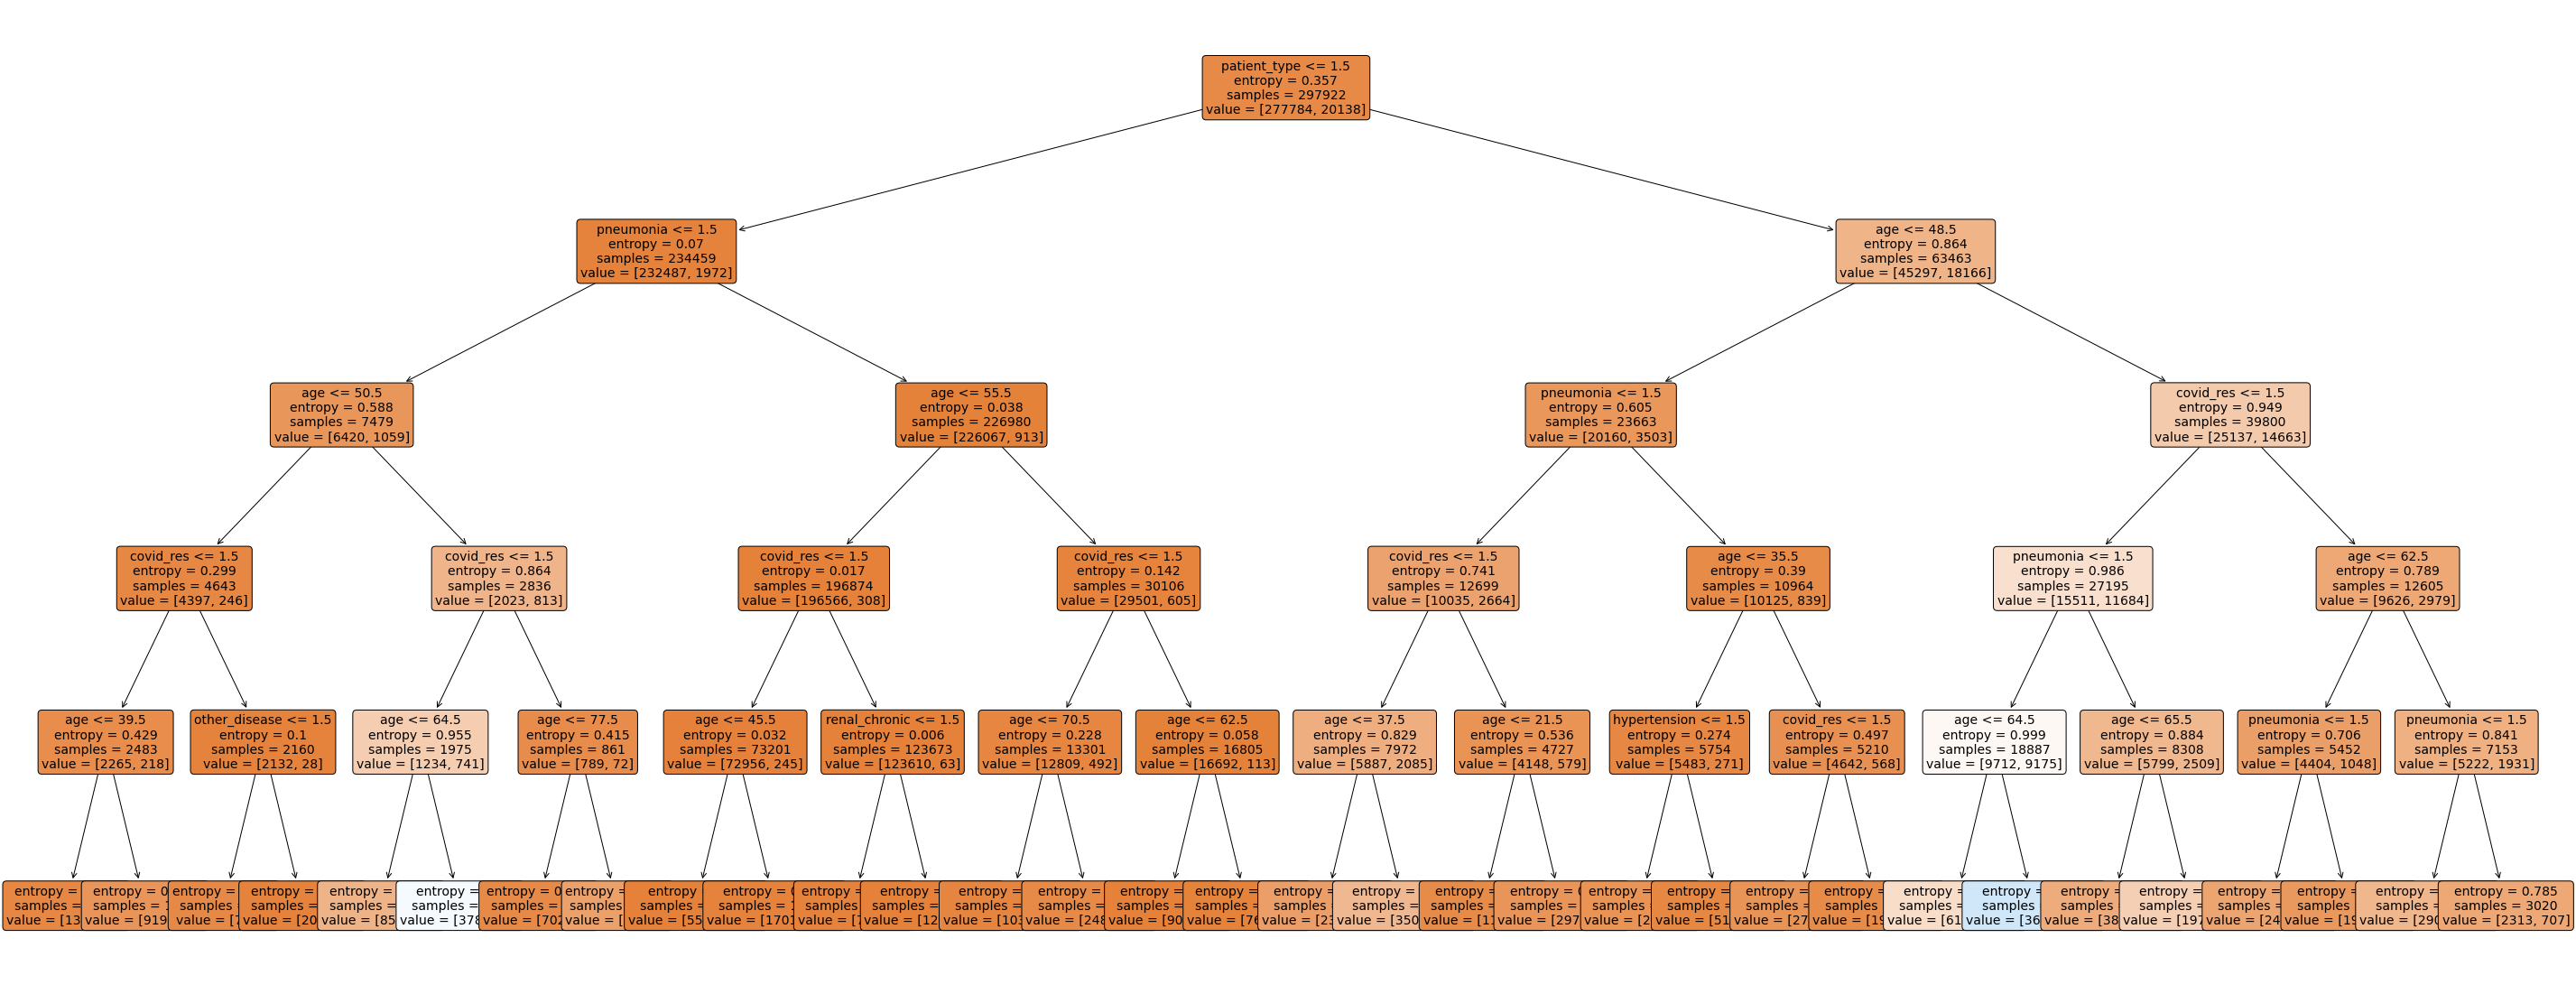

In [135]:
plt.figure(figsize=(50,20))
tree.plot_tree(myTree,
              feature_names = x_train.columns,
              filled=True, 
              rounded=True, 
              fontsize=14)

In [136]:
from sklearn import tree
myTree = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)  #gini is another criterion we can use
myTree = myTree.fit(x_train, y_train)

In [137]:
predictions = myTree.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))

Accuracy on test data is 0.94


Nice!! we got 94% accuracy 

---------------------------
Random Forest Classifier
---------------------------

In [138]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [139]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9284897918082723


-----------------------------------
Naive Bayes Classifier
-----------------------------------

In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [141]:
model = GaussianNB()
model.fit(x_train, y_train)
print(model)

expected = y_test
predicted = model.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.98      0.89      0.93    185158
           1       0.31      0.71      0.44     13457

    accuracy                           0.88    198615
   macro avg       0.65      0.80      0.68    198615
weighted avg       0.93      0.88      0.90    198615

[[164212  20946]
 [  3878   9579]]


------------------------------------
Running Naive Bayes on under sampled data set
------------------------------------

In [142]:
#fixing class imbalance problem
df = covClean 
died_no = df[df.date_died == 0].index
died_yes = df[df.date_died == 1].index

#the number indicates the number of samples in class date_died = 0, we can adjust that number
random_index = np.random.choice(died_no, 45000, replace = False)
under_sample_died_no = np.concatenate([died_yes, random_index])

under_sample = covClean.loc[under_sample_died_no]
under_sample.shape

#creating new training and testing sets
x = under_sample.drop(['date_died'], axis=1)
y = under_sample['date_died']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.4)

In [143]:
model = GaussianNB()
model.fit(x_train, y_train)
print(model)

expected = y_test
predicted = model.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     18085
           1       0.81      0.81      0.81     13353

    accuracy                           0.84     31438
   macro avg       0.83      0.83      0.83     31438
weighted avg       0.84      0.84      0.84     31438

[[15516  2569]
 [ 2519 10834]]


When running on dataset without class imbalance problem precision and recall increase significantly. 
